<a href="https://colab.research.google.com/github/neSTORY/MiniProject/blob/master/distribution_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# load dataset
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/distribution_prediction/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/distribution_prediction/data/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/distribution_prediction/data/sample_submission.csv")

## meta data
- index : 인덱스
- SEND_SPG_INNB : 송하인_격자공간고유번호
- REC_SPG_INNB : 수하인 격자공간고유번호
- DL_GD_LCLS_NM : 카테고리_대
- DL_GD_MCLS_NM : 카테고리_중
- INVC_CONT : 운송장 건 수


In [ ]:
train.head(10)

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9
3,3,1.154500e+15,5.011000e+15,식품,농산물,10
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3
5,5,1.168000e+15,5.011000e+15,화장품/미용,스킨케어,5
6,6,1.171000e+15,5.011000e+15,식품,농산물,5
7,7,2.623000e+15,5.011000e+15,패션의류,기타패션의류,5
8,8,2.626000e+15,5.011000e+15,식품,가공식품,3
9,9,2.726000e+15,5.011000e+15,식품,기타식품,3


In [ ]:
# column rename
train.rename(columns = {"SEND_SPG_INNB":"send","REC_SPG_INNB":"rec"}, inplace=True)
test.rename(columns = {"SEND_SPG_INNB":"send","REC_SPG_INNB":"rec"}, inplace=True)

# category 통합
train["category"] = train["DL_GD_LCLS_NM"] + "_" + train["DL_GD_MCLS_NM"]
test["category"] = test["DL_GD_LCLS_NM"] + "_" + test["DL_GD_MCLS_NM"]

# 불필요한 컬럼 제거
train.drop(["DL_GD_LCLS_NM", "DL_GD_MCLS_NM"], axis=1, inplace = True)
test.drop(["DL_GD_LCLS_NM", "DL_GD_MCLS_NM"], axis=1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      32000 non-null  int64  
 1   send       32000 non-null  float64
 2   rec        32000 non-null  float64
 3   INVC_CONT  32000 non-null  int64  
 4   category   32000 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     4640 non-null   int64  
 1   send      4640 non-null   float64
 2   rec       4640 non-null   float64
 3   category  4640 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 145.1+ KB


In [ ]:
# train.isna().sum()
# test.isna().sum()
# na 값 x

In [ ]:
train.describe()

,index,send,rec,INVC_CONT
count,32000.000000,3.200000e+04,3.200000e+04,32000.000000
mean,15999.500000,4.729981e+15,3.713145e+15,4.767875
std,9237.748643,7.387136e+14,1.320618e+15,5.752122
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7999.750000,5.011000e+15,2.820000e+15,3.000000
50%,15999.500000,5.011000e+15,4.146500e+15,3.000000
75%,23999.250000,5.013000e+15,4.812350e+15,5.000000
max,31999.000000,5.013000e+15,5.013000e+15,239.000000


In [ ]:
test.describe()

,index,send,rec
count,4640.000000,4.640000e+03,4.640000e+03
mean,34319.500000,4.742076e+15,3.715800e+15
std,1339.596954,7.226584e+14,1.322434e+15
min,32000.000000,1.111000e+15,1.111000e+15
25%,33159.750000,5.011000e+15,2.820000e+15
50%,34319.500000,5.011000e+15,4.146500e+15
75%,35479.250000,5.013000e+15,4.812150e+15
max,36639.000000,5.013000e+15,5.013000e+15


In [ ]:
train.send.nunique(), train.rec.nunique()

(234, 251)

In [ ]:
test.send.nunique(), test.rec.nunique()

(158, 247)

In [ ]:
train.category.nunique()

20

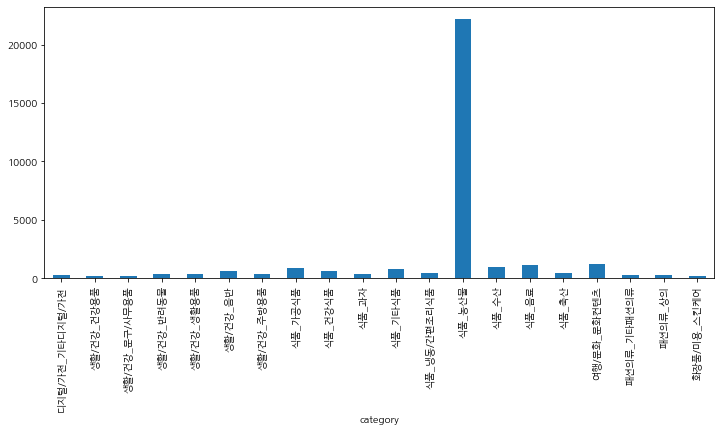

In [ ]:
plt.figure(figsize=(12,5))
train.groupby("category").count()["INVC_CONT"].plot(kind="bar")

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = train.drop(["INVC_CONT","index"], axis=1)
y_train = train["INVC_CONT"]

X_test = test.drop("index", axis=1)

In [ ]:
X_train

,send,rec,category
0,1.129000e+15,5.011000e+15,패션의류_상의
1,1.135000e+15,5.011000e+15,생활/건강_반려동물
2,1.135000e+15,5.011000e+15,패션의류_기타패션의류
3,1.154500e+15,5.011000e+15,식품_농산물
4,1.165000e+15,5.011000e+15,식품_가공식품
...,...,...,...
31995,5.011000e+15,2.635000e+15,식품_농산물
31996,5.011000e+15,1.168000e+15,식품_기타식품
31997,5.011000e+15,4.119700e+15,식품_농산물
31998,5.011000e+15,1.132000e+15,식품_농산물


In [ ]:
# # labeling
# def numbering(dataset, col):
#   le = LabelEncoder()
#   le.fit(dataset[col])
#   dataset[col] = le.transform(dataset[col])

In [ ]:
X_train = pd.get_dummies(X_train, columns=["category"], prefix=[""], prefix_sep="")
X_test = pd.get_dummies(X_test, columns=["category"], prefix=[""], prefix_sep="")

In [ ]:
X_train

,send,rec,디지털/가전_기타디지털/가전,생활/건강_건강용품,생활/건강_문구/사무용품,생활/건강_반려동물,생활/건강_생활용품,생활/건강_음반,생활/건강_주방용품,식품_가공식품,식품_건강식품,식품_과자,식품_기타식품,식품_냉동/간편조리식품,식품_농산물,식품_수산,식품_음료,식품_축산,여행/문화_문화컨텐츠,패션의류_기타패션의류,패션의류_상의,화장품/미용_스킨케어
0,1.129000e+15,5.011000e+15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.135000e+15,5.011000e+15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.135000e+15,5.011000e+15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.154500e+15,5.011000e+15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.165000e+15,5.011000e+15,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,5.011000e+15,2.635000e+15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31996,5.011000e+15,1.168000e+15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
31997,5.011000e+15,4.119700e+15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31998,5.011000e+15,1.132000e+15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((32000, 22), (4640, 22), (32000,))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
X_train.shape, X_valid.shape

((25600, 22), (6400, 22))

## MLP

In [ ]:
model = Sequential()

model.add(Dense(32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1))

In [ ]:
optimizer = [tf.keras.optimizers.Adam(lr=2e-4), tf.keras.optimizers.RMSprop(lr=1e-3)]

In [ ]:
model.compile(optimizer=optimizer[0], loss="mse", metrics=["mae"])

In [ ]:
history = model.fit(X_train,y_train, epochs= 100, validation_data=(X_valid,y_valid))

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 36.8165 - mae: 2.4474 - val_loss: 26.0519 - val_mae: 2.2742
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 33.8613 - mae: 2.2321 - val_loss: 25.8378 - val_mae: 2.0453
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 33.7098 - mae: 2.2269 - val_loss: 25.7108 - val_mae: 2.1461
Epoch 4/100
800/800 [==============================] - 2s 3ms/step - loss: 33.6228 - mae: 2.2219 - val_loss: 25.7409 - val_mae: 2.2567
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 33.5441 - mae: 2.2296 - val_loss: 25.7090 - val_mae: 2.1655
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 33.5254 - mae: 2.2185 - val_loss: 25.8089 - val_mae: 2.2768
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 33.5091 - mae: 2.2144 - val_loss: 25.6796 - val_mae: 2.2595
Epoch 8/100
800/800 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
pred = model.predict(X_test)

In [ ]:
model.evaluate(X_valid, y_valid)

200/200 [==============================] - 0s 2ms/step - loss: 25.4128 - mae: 2.0834


[25.412817001342773, 2.083350658416748]

In [ ]:
submission

,index,INVC_CONT
0,32000,0
1,32001,0
2,32002,0
3,32003,0
4,32004,0
...,...,...
4635,36635,0
4636,36636,0
4637,36637,0
4638,36638,0


In [ ]:
submission["INVC_CONT"] = pred

In [ ]:
submission["INVC_CONT"].describe()

count    4640.000000
mean        4.312069
std         1.038608
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max        16.000000
Name: INVC_CONT, dtype: float64

In [ ]:
submission["INVC_CONT"] = submission["INVC_CONT"].astype("int32")

In [ ]:
submission.to_csv("my_sub_1210_3.csv", index=False)

In [ ]:
train

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1.129000e+15,5.011000e+15,패션의류,상의,3
1,1,1.135000e+15,5.011000e+15,생활/건강,반려동물,3
2,2,1.135000e+15,5.011000e+15,패션의류,기타패션의류,9
3,3,1.154500e+15,5.011000e+15,식품,농산물,10
4,4,1.165000e+15,5.011000e+15,식품,가공식품,3
...,...,...,...,...,...,...
31995,31995,5.011000e+15,2.635000e+15,식품,농산물,6
31996,31996,5.011000e+15,1.168000e+15,식품,기타식품,5
31997,31997,5.011000e+15,4.119700e+15,식품,농산물,9
31998,31998,5.011000e+15,1.132000e+15,식품,농산물,3


In [ ]:
train.SEND_SPG_INNB.nunique(), train.REC_SPG_INNB.nunique()

(234, 251)

In [ ]:
test.SEND_SPG_INNB.nunique(), test.REC_SPG_INNB.nunique()

(158, 247)

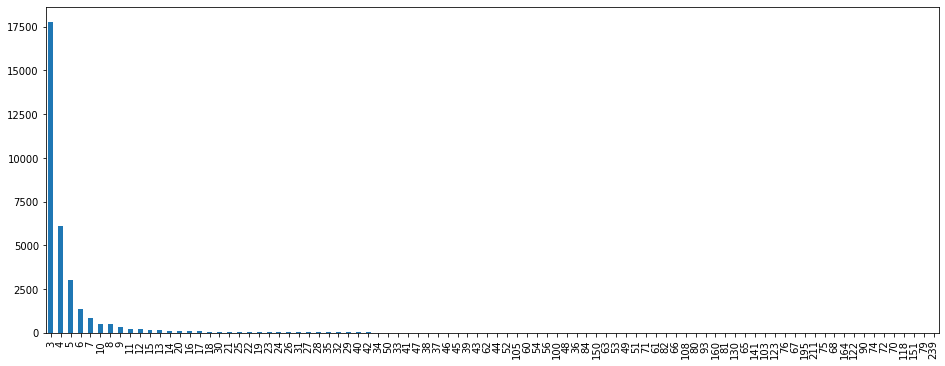

In [ ]:
plt.figure(figsize=(16,6))
train["INVC_CONT"].value_counts().plot(kind="bar")

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
X_train = train.drop(["INVC_CONT"], axis=1)
y_train = train["INVC_CONT"]

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(test)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lgb_params = {
    "learning_rate":
}

In [ ]:
model = LGBMRegressor()
model.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
model.train()

AttributeError: ignored